<p id="part0"></p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: white"> LINEAR REGRESSION</p>

<p style="font-family: Arials; font-size: 14px; text-align: left; font-style: normal;  letter-spacing: 2px;  line-height:1.3">
    NIM  : 1206210016 <br>
    Nama : Avriono Aritonang  <br>
    Kelas : DS-01-01</a></p>

## Importing the libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [24]:
#independen years experience dependen nya salary
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Prepocessing

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [54]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## EDA

C:\Users\avrio\AppData\Local\Temp\ipykernel_21112\3010132517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

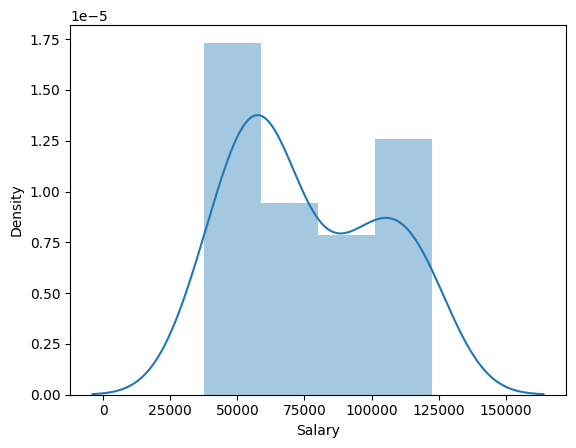

In [8]:
sns.distplot(dataset['Salary'])

C:\Users\avrio\AppData\Local\Temp\ipykernel_21112\1750535190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

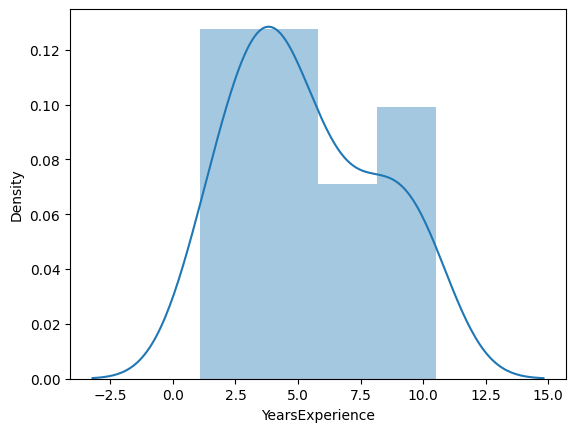

In [10]:
sns.distplot(dataset['YearsExperience'])

In [21]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

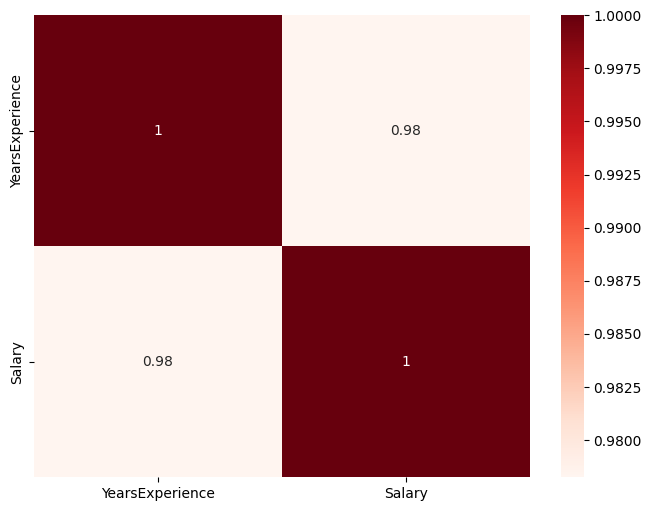

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True,cmap='Reds')

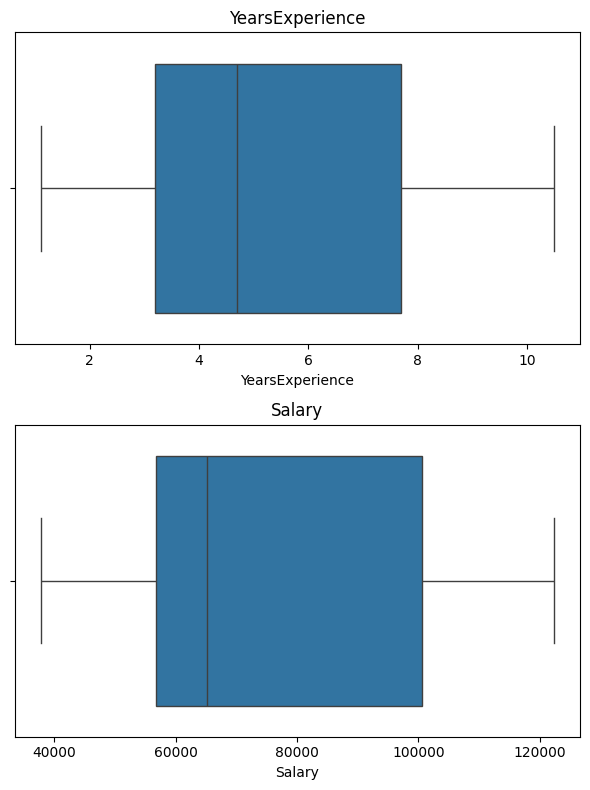

In [53]:
fig, axs = plt.subplots(2, figsize = (6,8))
sns.boxplot(dataset['YearsExperience'], ax = axs[0], orient='h')
axs[0].set_title('YearsExperience')

sns.boxplot(dataset['Salary'], ax = axs[1], orient='h')
axs[1].set_title('Salary')

plt.tight_layout()

## Importing the dataset

In [12]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
#digunakan untuk menghasilkan pembagian data yang sama

In [33]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

20
10
20
10


## Training the Simple Linear Regression model on the Training set

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

fungsi fit() akan menyesuaikan garis  dengan data training sehingga model dapat memprediksi nilai target (y) berdasarkan fitur-fitur (X)

## Uji Asumsi Klasik

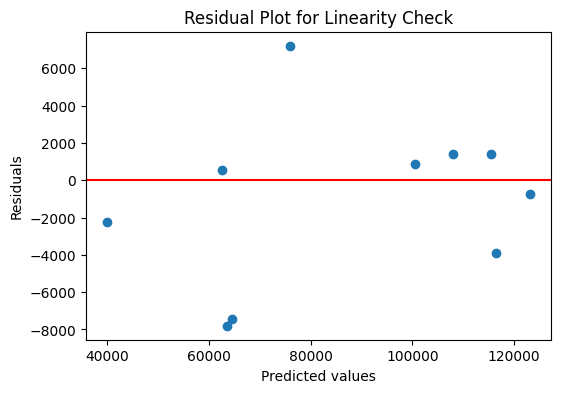

In [78]:
# Menghitung residual
residuals = y_test - regressor.predict(X_test)
# Plot residual terhadap nilai prediksi
plt.figure(figsize=(6, 4))
plt.scatter(regressor.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Garis horizontal di y=0 sebagai acuan
plt.title('Residual Plot for Linearity Check')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [79]:
# Menghitung residual
residuals = y_test - regressor.predict(X_test)

# Uji normalitas menggunakan Shapiro-Wilk
stat, p_value = stats.shapiro(residuals)

# Menafsirkan hasil uji
alpha = 0.05
if p_value > alpha:
    print("Residuals are normally distributed (Tidak ada bukti cukup untuk menolak H0)")
else:
    print("Residuals are not normally distributed (Ada bukti cukup untuk menolak H0)")

Residuals are normally distributed (Tidak ada bukti cukup untuk menolak H0)


In [80]:
# Tambahkan kolom konstan ke variabel independen
X_test_with_const = sm.add_constant(X_test)

# Menghitung residual
residuals = y_test - regressor.predict(X_test)

# Uji Breusch-Pagan dengan variabel independen yang sudah termasuk kolom konstan
_, p_value, _, _ = sms.het_breuschpagan(residuals, X_test_with_const)

# Menafsirkan hasil uji
alpha = 0.05
if p_value > alpha:
    print("Homoskedasticity is satisfied (Tidak ada bukti cukup untuk menolak H0)")
else:
    print("Homoskedasticity is not satisfied (Ada bukti cukup untuk menolak H0)")

Homoskedasticity is satisfied (Tidak ada bukti cukup untuk menolak H0)


In [81]:

# Asumsikan X adalah sebuah NumPy array
# Duplicating array X into vif_data
vif_data = np.copy(X)

# Adding a constant column with value 1
constant_column = np.ones((vif_data.shape[0], 1))  # Membuat kolom konstan dengan nilai 1
vif_data = np.concatenate((constant_column, vif_data), axis=1)  # Menggabungkan kolom konstan ke array X

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = [f'X{i}' for i in range(vif_data.shape[1])]  # Memberi nama variabel sebagai X0, X1, dst.
vif["VIF"] = [variance_inflation_factor(vif_data, i) for i in range(vif_data.shape[1])]

# Display VIF results
print(vif)


  Variable       VIF
0       X0  4.626326
1       X1  1.000000


In [82]:
# Menghitung residual
residuals = y_test - regressor.predict(X_test)

# Uji Durbin-Watson
durbin_watson_stat = durbin_watson(residuals)

# Menafsirkan hasil uji
if durbin_watson_stat < 1.5:
    print("Autocorrelation is present (Positive autocorrelation)")
elif durbin_watson_stat > 2.5:
    print("Autocorrelation is present (Negative autocorrelation)")
else:
    print("No autocorrelation detected")

No autocorrelation detected


## Predicting the Test set results

In [34]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

## Pengujian performansi data

In [36]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:



**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


Comparing these metrics:


- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.


All of these are **loss functions**, because we want to minimize them.

In [37]:
print("Koefisien Regresi: \n", regr.coef_)
print("Konstanta Regresi: \n", regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Koefisien Regresi: 
 [9345.94244312]
Konstanta Regresi: 
 26816.192244031183
Mean squared error: 21026037.33
Coefficient of determination: 0.97


## Visualising the Training set results

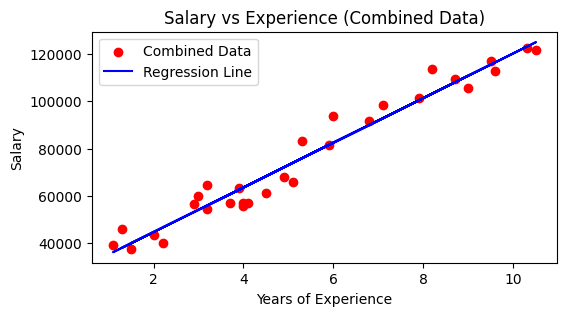

In [64]:
import matplotlib.pyplot as plt

# Menggabungkan data training dan testing
X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Melatih ulang model dengan data gabungan
regressor.fit(X_combined, y_combined)

# Plotting garis regresi dengan data gabungan
plt.figure(figsize=(6, 3))
plt.scatter(X_combined, y_combined, color='red', label='Combined Data')
plt.plot(X_combined, regressor.predict(X_combined), color='blue', label='Regression Line')
plt.title('Salary vs Experience (Combined Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


<p style="font-family: Arials; font-size: 14px; text-align: left; font-style: normal;  letter-spacing: 2px;  line-height:1.3">
Pada regresi linear, jika terdapat hubungan yang linear antara dua variabel seperti pengalaman dan gaji, ini berarti setiap kenaikan dalam pengalaman cenderung diikuti dengan peningkatan yang sebanding dalam gaji. Bentuk regresi linear akan mencoba menemukan garis yang paling cocok untuk memvisualisasikan hubungan ini antara pengalaman (variabel independen) dan gaji (variabel dependen). Jadi, bisa dilihat ketika  melihat plot regresi linear,  kecenderungan kenaikan gaji seiring dengan kenaikan pengalaman kerja secara linear.